<p align="center">
  <img src="images/logo.png" width="300"/>
</p>

<span style='font-weight:bold; font-size:xx-large'>Valve insight - Switching analysis</span>

Below we show some algorithms from our [ValveInsight](https://www.buerkert.de/de/landingpage/zuverlaessige-analysegeraete-durch-diagnose-mit-valveinsight) portfolio. 

- Switching fault detection 
- Switching duration detection. 

The sample data was acquired with the Valve Insight eval kit. For comparison we also show a few sample curves measured with high end laboratory equipment. 

If you have further requests or need a more fine-tuned solution please [contact us](info@burkert.com). 

In [1]:
import numpy as np
import pandas as pd

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Valve insight algorithms
import algorithms_python.src.valveinsight as vi

# Load data

Load the data from the csv files using pandas.

In [2]:
df_current_lab_low_noise = pd.read_csv('data/Lab_LowNoise_AllGood#Current.csv', index_col=False)
df_current = pd.read_csv('data/ValveInsight#EvalKit#Current.csv', index_col=False)
df_voltage = pd.read_csv('data/ValveInsight#EvalKit#Voltage.csv', index_col=False)
df_params = pd.read_csv('data/ValveInsight#EvalKit#Attributes.csv', index_col=False)

In [3]:
df_current

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,24.5,24.55,24.6,24.65,24.7,24.75,24.8,24.85,24.9,24.95
0,29.274545,42.988977,45.706229,46.629069,46.577801,46.065112,45.424250,44.860292,44.116893,43.347860,...,50.320431,50.448603,50.422968,50.499872,50.371700,50.269162,50.499872,50.346065,50.422968,50.320431
1,29.325814,43.270956,45.706229,46.577801,46.449628,46.013843,45.372981,44.527044,43.860549,43.142784,...,50.422968,50.243527,50.499872,50.320431,50.448603,50.499872,50.371700,50.448603,50.371700,50.422968
2,28.479877,42.655729,45.449885,46.526532,46.629069,46.142015,45.552422,45.014099,44.116893,43.399128,...,50.422968,50.448603,50.269162,50.320431,50.320431,50.371700,50.499872,50.371700,50.499872,50.371700
3,29.351448,43.450397,45.731864,46.577801,46.552166,45.911305,45.424250,44.706486,44.014355,43.347860,...,50.320431,50.269162,50.346065,50.499872,50.320431,50.499872,50.371700,50.243527,50.499872,50.346065
4,28.249167,42.501923,45.116637,46.347090,46.449628,45.808767,45.270443,44.603948,43.758011,43.270956,...,50.474237,50.320431,50.371700,50.499872,50.422968,50.499872,50.422968,50.371700,50.499872,50.320431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,28.326070,42.501923,45.449885,46.475263,46.500897,46.013843,45.424250,44.860292,44.116893,43.373494,...,50.602410,50.807485,50.602410,50.807485,50.653679,50.551141,50.628044,50.628044,50.628044,50.807485
69,29.351448,43.168418,45.731864,46.475263,46.347090,45.885670,45.270443,44.603948,43.809280,43.065881,...,50.807485,50.807485,50.858754,50.628044,50.807485,50.653679,50.807485,50.858754,50.781851,50.807485
70,30.017944,43.014612,45.552422,46.475263,46.475263,45.936939,45.449885,44.732120,43.783645,43.270956,...,50.858754,50.910023,50.858754,50.910023,50.910023,50.807485,50.910023,50.807485,50.858754,50.858754
71,29.197642,43.296591,45.629326,46.552166,46.449628,45.808767,45.372981,44.578313,44.014355,43.117149,...,50.858754,50.858754,50.807485,50.935658,50.807485,50.858754,50.858754,50.653679,50.858754,50.807485


The current dataframe contains the current measurements. Each row is one measurement. The columns are the timestamps in milliseconds (ms).

In [4]:
df_params.head()

,fault
0,False
1,False
2,False
3,False
4,False


The params dataframe contains the information, if a valve switching was successful or not.   
It is based on the criterion that at least 90% of the flow should pass, if the valve opened successfully. 

# Visualize

## Low-noise dataset

As a reference we show some laboratory measurements with high end measurement equipment.  
This data has a very good signal to noise ratio. 

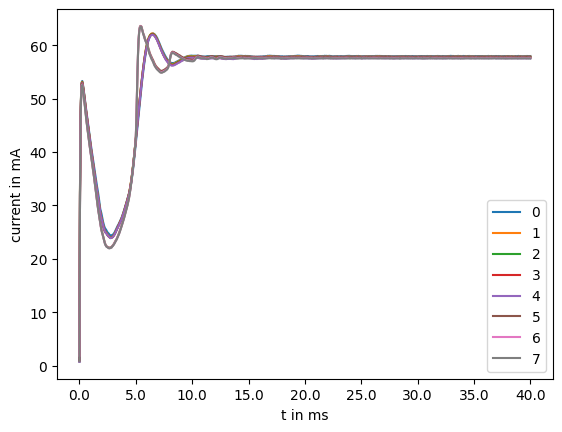

In [5]:
_ = df_current_lab_low_noise.T.plot(xlabel='t in ms', ylabel='current in mA')

## Valve insight eval kit

Below we show data aquired with the valve insight eval kit for successful and unsuccessful switching.  
The noise level is higher, but still small enough for an analysis. 

In [6]:
t_ms = df_current.columns.astype(float)

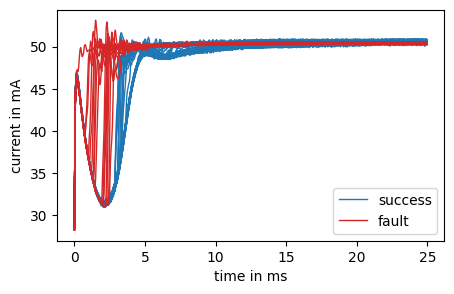

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))

label_success = False
label_fault = False
for i in df_params.index:
    if df_params['fault'].loc[i] == False:
        label = None
        alpha = 0.2
        if not label_success:
            label = 'success'
            label_success = True
        ax.plot(t_ms, df_current.loc[i], 'tab:blue', zorder=-199, label=label, linewidth=1, rasterized=True)
    else:
        label = None
        if not label_fault:
            label = 'fault'
            alpha = 1
            label_fault = True
        ax.plot(t_ms, df_current.loc[i], 'tab:red', alpha=alpha, zorder=-99, label=label, linewidth=1, rasterized=True)

ax.set_xlabel('time in ms')
ax.set_ylabel('current in mA')
_ = ax.legend(loc='best')

# Switching detection


|                   | CPU Usage    | Memory usage            | Output quality   | Result Availability   | Parameter scope (*)       |
|-------------------|--------------|-------------------------|------------------|-----------------------|---------------------------|
| Static            | Low          | Full current curve      | High             | Post-acquisition      | Fixed set of parameters   |
| Tail slope check  | High         | Full current curve      | High             | Post-acquisition      | Broad range of parameters |
| Online            | Very low     | Sliding window          | Estimated        | During acquisition    | Fixed set of parameters   |

(*) Parameter scope entails various temperatures, pressures, operation times, ...


## Switching detection - static

This is the most simple form of the switching detection algorithm. It is preferred for any application, as it is the most stable.  

Implementation in an application will be as follows: 
- The inrush current is measured as a function of time.
- The switching detection algorithm calculates an integral value of the inrush current.
- If the integral value is above a threshold the valve switching was successful. 

In [8]:
U = 24  # V

integrals = []
tail_means = []
for i in df_params.index:
    I = df_current.loc[i].to_numpy()
    integral, tail_mean = vi.switching_detection_fixed(t_ms, I*U)
    integrals.append(integral)
    tail_means.append(tail_mean)

df_params['integral - static'] = integrals
df_params['tail mean - static'] = tail_means

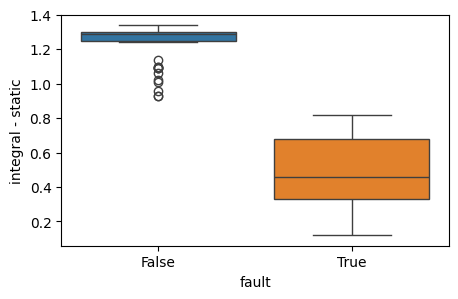

In [9]:
plt.figure(figsize=(5, 3))  
_ = sns.boxplot(x='fault', y='integral - static', hue='fault', data=df_params, legend=False)

The boxplot shows the separation of the valve switching fault states 'True' and 'False' by the integral.  
Successful switching (swichting fault state = 'False') has some outliers. These outliers mark cases where the valve opened partially. However the valve stroke was still good enough for 90% flow to pass the valve. 

## Switching detection - tail slope check

If the application must work over a wide range of pressures and temperature ranges, a fixed measurement duration as required by the static algorithm can pose some problems.  
I.e. the switching duration might be longer in some corner cases and using the longest duration in general with the static algorithm will lead to the tail_mean being obscured by temperature effects.  
In this case it is more stable to use the algorithm below, which stops integration, once the tail mean slope is small enough. 

Implementation in an application will be as follows:
- The inrush current is measured as a function of time.
- The switching detection algorithm calculates an integral value of the inrush current.
- If the integral value is above a threshold the valve switching was successful. 

In [10]:
U = 24  # V

integrals = []
tail_means = []
for i in df_params.index:
    I = df_current.loc[i].to_numpy()
    integral, tail_mean = vi.switching_detection_tail_slope(t_ms, I*U)
    integrals.append(integral)
    tail_means.append(tail_mean)

df_params['integral - tail slope'] = integrals
df_params['tail mean - tail slope'] = tail_means

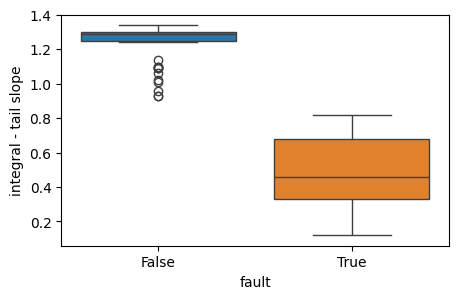

In [11]:
plt.figure(figsize=(5, 3))  
_ = sns.boxplot(x='fault', y='integral - tail slope', hue='fault', data=df_params, legend=False)

Overall the boxplot shows the same values as the one for the static algorithm. 

## Switching detection - online algorithm

The algorithms above require you to capture the complete current curve. After the data acquisition is complete, the algorithms do their calculation.  
The algorithm below does an estimation of the integral value from the algorithms above that works online. I.e. it updates the integral value during the data acquisiton. 

*Advantages:*
 - Less memory required  
   Tail mean window can be made much smaller if necessary.
 - Results available faster

*Disadvantages:*
 - Estimation only (albeit a good one)
  
&nbsp;
&nbsp;

**Implementation** in an application will be as follows:

For one timestep: 
- The inrush current is measured.
- Feed the inrush current to the switching detection algorithm.
- If enough data has been accumulated the switching detection algorithm returns an integral value.

Repeat until:
- If at any point the integral value is above the threshold, the valve switching is successful.
- If a preset duration is over (a multiples of the typical switching duration) without the integral value reaching the threshold, the valve switching is unsuccessful. 

In [12]:
integrals = []
tail_means = []

for i in df_params.index:
    swdo = vi.switching_detection_online()
    I = df_current.loc[i].to_numpy()
    timestep_ms = t_ms[1] - t_ms[0]
    
    # Simulate point by point acquisition and feed data to algorithm with a for loop
    for Ii in I:
        integral, tail_mean = swdo.switching_detection_online(Ii, timestep_ms)

    integrals.append(integral)
    tail_means.append(tail_mean)

df_params['integral - online'] = integrals
df_params['tail mean - online'] = tail_means

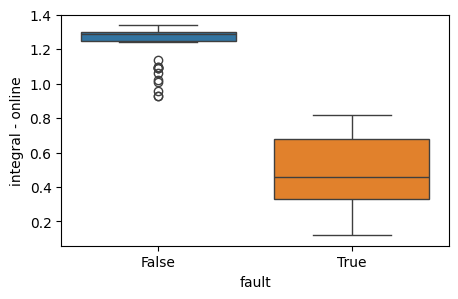

In [13]:
plt.figure(figsize=(5, 3))  
_ = sns.boxplot(x='fault', y='integral - online', hue='fault', data=df_params, legend=False)

The boxplot shows the same values as for the static algorithm.

# Switching duration

To estimate the valve switching duration, we present several algorithms:

1. Inside Band Method (based on Semi E17-1011 standard):  
This approach defines a successful switching event as one where all current values remain within a specified band around the final steady-state current. It offers high reliability and is aligned with established industry standards.  

2. Integral Threshold Method:
This method uses the same integral calculation as in the switching detection algorithm. It determines the switching duration by identifying the point in time when the integral value first exceeds the predefined threshold for successful switching.

3. Online algorithm:
An algorithm that works during data acquisition and stops as soon as switching is complete.

Both methods are designed for post-acquisition analysis and support a broad range of operating conditions.

|                    | CPU Usage    | Memory usage            | Output quality   | Result Availability   | Parameter scope (*)          |
|--------------------|--------------|-------------------------|------------------|-----------------------|------------------------------|
| Inside band        | Low          | Full current curve      | High             | Post-acquisition      |  Broad range of parameters   |
| Integral threshold | Medium       | Full current curve      | High             | Post-acquisition      |  Broad range of parameters   |
| Online             | High         | Sliding window          | High             | During acquisistion   |  Broad range of parameters   |

(*) Parameter scope entails various temperatures, pressures, operation times, ...

In [14]:
def plot_duration(s):
    fig, ax = plt.subplots(figsize=(5, 3))
    
    idx = df_params['fault'] == False
    ax.plot(df_params[idx][s], '.', color='tab:blue', label='switching successful')
    idx = df_params['fault'] == True
    ax.plot(df_params[idx][s], '.', color='tab:red', label='switching fault')
    
    ax.set_xlabel('experiment number')
    ax.set_ylabel('switching time - inside band - in ms')
    ax.legend(loc='best')
    
    return fig, ax

## Switching duration - inside band

In [15]:
switching_durations = []
for i in df_params.index:
    I = df_current.loc[i].to_numpy()
    duration = vi.switching_duration_inside_band(t_ms, I, band=0.1)
    switching_durations.append(duration)

df_params['switching duration - inside band - in ms'] = switching_durations

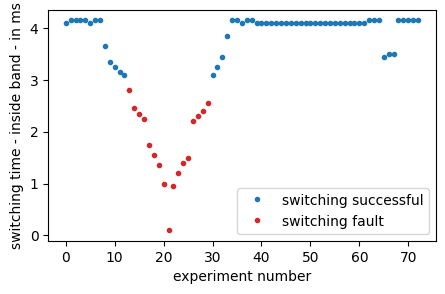

In [16]:
_ = plot_duration('switching duration - inside band - in ms')

The figure shows the switching time per measurement. 

*Caveat* It looks that from the switching time, a valve switching fault can be detected. However, this is not robust for different temperatures, pressures and valves. Always use a switching detection algorithm for this information. 

## Switching duration - integral threshold

In [17]:
switching_durations = []
for i in df_params.index:
    I = df_current.loc[i].to_numpy()
    duration = vi.switching_duration_integral_threshold(t_ms, I, integral_threshold=0.8)
    switching_durations.append(duration)

df_params['switching duration - inside band - in ms'] = switching_durations

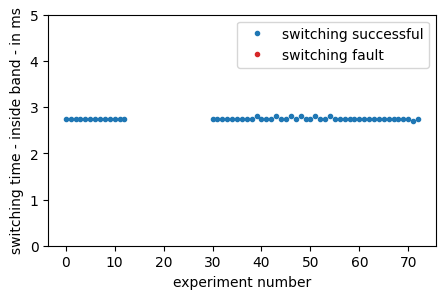

In [18]:
fig, ax = plot_duration('switching duration - inside band - in ms')
_ = ax.set_ylim(0, 5)

## Switching duration - online algorithm

In [19]:
switching_durations = []
for i in df_params.index:
    swdo = vi.switching_duration_online(tail_slope_max=0.2)
    I = df_current.loc[i].to_numpy()
    timestep_ms = t_ms[1] - t_ms[0]
    
    # Simulate point by point acquisition and feed data to algorithm with a for loop
    for Ii in I:
        duration = swdo.switching_duration_online(Ii, timestep_ms)
        if not np.isnan(duration):
            break

    switching_durations.append(duration)

df_params['switching duration - online - in ms'] = switching_durations

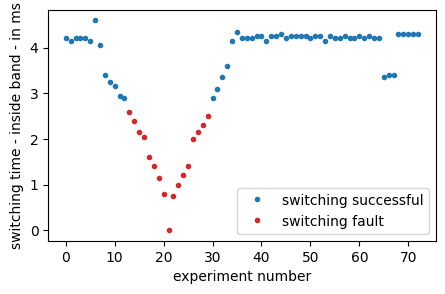

In [20]:
_ = plot_duration('switching duration - online - in ms')

# C algorithms

Export some data for the unit tests of the C algorithms or for other tests.  
Check some of the algorithms against python libraries.  

## Export data set - Successful switching

Scale to range of int16_t and export to be used in unit tests. 

In [21]:
curr_scale_to_use_uint16_range = 500

In [22]:
def convert_current_to_C(idx, scale):
    curr = df_current.loc[idx].round(2).to_numpy()
    curr *= scale
    curr = curr.astype(int)
    return curr

def export_current_to_C(curr):
    formatted = ', '.join(f"{x}" for x in curr)
    c_array_str = f"{{ {formatted} }}"
    print(c_array_str)

In [23]:
switching_successful_idx = 0
curr = convert_current_to_C(switching_successful_idx, curr_scale_to_use_uint16_range)
export_current_to_C(curr)

{ 14635, 21495, 22855, 23315, 23290, 23035, 22710, 22430, 22060, 21675, 21355, 20920, 20585, 20300, 19995, 19725, 19365, 19125, 18865, 18625, 18455, 18175, 18010, 17765, 17520, 17420, 17150, 16995, 16855, 16675, 16485, 16370, 16265, 16239, 16110, 16045, 15930, 15780, 15750, 15675, 15675, 15610, 15560, 15610, 15610, 15675, 15675, 15675, 15740, 15780, 15780, 15945, 15970, 16075, 16149, 16239, 16405, 16495, 16715, 16920, 17035, 17280, 17430, 17650, 17880, 18110, 18365, 18660, 18865, 19215, 19445, 19765, 20110, 20300, 20685, 20890, 21175, 21535, 21700, 22060, 22240, 22455, 22775, 22865, 23110, 23315, 23390, 23595, 23700, 23840, 24030, 24070, 24200, 24250, 24290, 24415, 24440, 24530, 24480, 24480, 24545, 24560, 24560, 24595, 24480, 24585, 24530, 24495, 24585, 24530, 24545, 24480, 24415, 24480, 24440, 24440, 24440, 24380, 24380, 24315, 24355, 24415, 24380, 24405, 24380, 24315, 24405, 24355, 24405, 24355, 24315, 24380, 24355, 24405, 24415, 24355, 24440, 24405, 24380, 24440, 24440, 24470, 2447

## Export data set - Unsuccessful switching

In [24]:
switching_fault_idx = 18
curr = convert_current_to_C(switching_fault_idx, curr_scale_to_use_uint16_range)
export_current_to_C(curr)

{ 14165, 21160, 22570, 23150, 23120, 22855, 22595, 22265, 21905, 21570, 21175, 20840, 20520, 20200, 19880, 19535, 19330, 19045, 18805, 18650, 18330, 18175, 17880, 17650, 17510, 17305, 17110, 16995, 17635, 19455, 21240, 22865, 23765, 24120, 24200, 23970, 23750, 23865, 24175, 24765, 25070, 25060, 24970, 24650, 24610, 24735, 24890, 25070, 25135, 25120, 25160, 25120, 25160, 25095, 25030, 24970, 24915, 24970, 24995, 24940, 24970, 24970, 24970, 25030, 24940, 24970, 24970, 24940, 25030, 24970, 24915, 24940, 24915, 25030, 25030, 24995, 25030, 24970, 24995, 24940, 24915, 24995, 24970, 25030, 24995, 24915, 25030, 25030, 25070, 25160, 25095, 25095, 25095, 25060, 25095, 25070, 25095, 25095, 25030, 25070, 25070, 25070, 25095, 25030, 25095, 25070, 25030, 25120, 25030, 25060, 25030, 25030, 25070, 25020, 25070, 25070, 25020, 25120, 25070, 25070, 25095, 25070, 25120, 25120, 25060, 25070, 25060, 25095, 25095, 25060, 25120, 25070, 25120, 25135, 25095, 25120, 25095, 25095, 25120, 25070, 25135, 25095, 2506

## Expected results for C unit test

### Switching detection static

In [25]:
curr = convert_current_to_C(switching_successful_idx, curr_scale_to_use_uint16_range)
res = vi.switching_detection_fixed(t_ms, curr)
print(f'Switching successful. Integral: {res[0]}, Tail-Mean: {res[1]}')

curr = convert_current_to_C(switching_fault_idx, curr_scale_to_use_uint16_range)
res = vi.switching_detection_fixed(t_ms, curr)
print(f'Switching fault. Integral: {res[0]}, Tail-Mean: {res[1]}')

Switching successful. Integral: 1.3, Tail-Mean: 25157.725
Switching fault. Integral: 0.41, Tail-Mean: 25219.275


### Switching detection - tail slope check

In [26]:
curr = convert_current_to_C(switching_successful_idx, curr_scale_to_use_uint16_range)
res = vi.switching_detection_tail_slope(t_ms, curr, slope_threshold=0.002*curr_scale_to_use_uint16_range)
print(f'Switching successful. Integral: {res[0]}, Tail-Mean: {res[1]}')

curr = convert_current_to_C(switching_fault_idx, curr_scale_to_use_uint16_range)
res = vi.switching_detection_tail_slope(t_ms, curr, slope_threshold=0.002*curr_scale_to_use_uint16_range)
print(f'Switching fault. Integral: {res[0]}, Tail-Mean: {res[1]}')

Switching successful. Integral: 1.3, Tail-Mean: 25157.725
Switching fault. Integral: 0.41, Tail-Mean: 25211.8


### Switching detection - online algorithm

In [27]:
curr = convert_current_to_C(switching_successful_idx, curr_scale_to_use_uint16_range)
swdo = vi.switching_detection_online()
for Ii in curr:
    integral, tail_mean = swdo.switching_detection_online(Ii, timestep_ms)
print(f'Switching successful. Integral: {integral}, Tail-Mean: {tail_mean}')

curr = convert_current_to_C(switching_fault_idx, curr_scale_to_use_uint16_range)
swdo = vi.switching_detection_online()
for Ii in curr:
    integral, tail_mean = swdo.switching_detection_online(Ii, timestep_ms)
print(f'Switching fault. Integral: {integral}, Tail-Mean: {tail_mean}')

Switching successful. Integral: 1.3, Tail-Mean: 25157.725
Switching fault. Integral: 0.41, Tail-Mean: 25219.275


### Switching duration - inside band

In [36]:
curr = convert_current_to_C(switching_successful_idx, curr_scale_to_use_uint16_range)
duration = vi.switching_duration_inside_band(t_ms, curr, band=0.1)
print(f'Switching successful. Duration: {duration}')

curr = convert_current_to_C(switching_fault_idx, curr_scale_to_use_uint16_range)
duration = vi.switching_duration_inside_band(t_ms, curr, band=0.1)
print(f'Switching successful. Duration: {duration}')

Switching successful. Duration: 4.1
Switching successful. Duration: 1.55


### Switching duration - integral threshold

In [37]:
curr = convert_current_to_C(switching_successful_idx, curr_scale_to_use_uint16_range)
duration = vi.switching_duration_integral_threshold(t_ms, curr)
print(f'Switching successful. Duration: {duration}')

curr = convert_current_to_C(switching_fault_idx, curr_scale_to_use_uint16_range)
duration = vi.switching_duration_integral_threshold(t_ms, curr)
print(f'Switching successful. Duration: {duration}')

Switching successful. Duration: 2.75
Switching successful. Duration: 24.95


### Switching duration - online algorithm

In [40]:
def simulate_duration_online(curr):
    swdo = vi.switching_duration_online(tail_slope_max=0.2*curr_scale_to_use_uint16_range)
    for Ii in curr:
        duration = swdo.switching_duration_online(Ii, timestep_ms)
        if not np.isnan(duration):
            break
    return np.round(duration, 2)

In [41]:
curr = convert_current_to_C(switching_successful_idx, curr_scale_to_use_uint16_range)
duration = simulate_duration_online(curr)
print(f'Switching successful. Duration: {duration}')

curr = convert_current_to_C(switching_fault_idx, curr_scale_to_use_uint16_range)
duration = simulate_duration_online(curr)
print(f'Switching successful. Duration: {duration}')

Switching successful. Duration: 4.2
Switching successful. Duration: 1.4


## Manual linear regression vs library

Test manual implementation of fast linear regression algorithm for slope  against scipy implementation. 

In [31]:
INRUSH_CURRENT_VALUES = 1000

def linearRegressionSlopeEquidistant(timestep, y, windowStart, n):
    if (n < 2) | (timestep == 0.0) | (windowStart + n > INRUSH_CURRENT_VALUES):
        return 0.0

    summ = 0.0;
    mid = (n - 1) / 2.0;

    for i in range(n):
        summ += (i - mid) * y[windowStart + i]

    factor = 12.0 / (n * (n * n - 1))
    return factor * summ / timestep


linearRegressionSlopeEquidistant(0.05, curr, 200, 200)

1.9099227480687015

In [32]:
import scipy.stats

t = np.arange(0, len(curr)*0.05, 0.05)
res = scipy.stats.linregress(t[200:400], curr[200:400])
res[0]

1.9099227480687007